Цель прокта- разработать модель, которая позволила бы агентству
недвижимости обойти конкурентов по скорости и качеству совершения
сделок.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
zip_file_path = 'data.csv.zip'
with zipfile.ZipFile(zip_file_path, 'r') as archive:
    with archive.open(archive.namelist()[0]) as file:
        data = pd.read_csv(file)
data







,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377180,NaN,NaN,Single Family,20800 NE 23rd Ave,6.0,"{'atAGlanceFacts': [{'factValue': '1990', 'fac...",NaN,Miami,"[{'rating': ['10/10', '5/10'], 'data': {'Dista...","4,017",33180,5,FL,0.0,NaN,Yes,A10702700,"$1,249,000"
377181,for sale,NaN,condo,3530 N Lake Shore Dr #4B,3 Baths,"{'atAGlanceFacts': [{'factValue': '1924', 'fac...",NaN,Chicago,"[{'rating': ['1/10', '5/10', '7/10'], 'data': ...","2,000 sqft",60657,3 Beds,IL,9.0,NaN,NaN,10374233,"$674,999"
377182,for sale,NaN,single-family home,15509 Linden Blvd,3 Baths,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",NaN,Jamaica,"[{'rating': ['5/10', '4/10'], 'data': {'Distan...","1,152 sqft",11434,3 Beds,NY,2,NaN,NaN,NaN,"$528,000"
377183,NaN,NaN,NaN,7810 Pereida St,NaN,"{'atAGlanceFacts': [{'factValue': None, 'factL...",NaN,Houston,"[{'rating': ['NA', 'NA', 'NA'], 'data': {'Dist...",NaN,77028,"8,479 sqft",TX,NaN,NaN,NaN,NaN,"$34,500"


1. Очиста данных 

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

In [3]:

data['private pool'] = data['private pool'].replace({'yes': 'есть', 'no': 'нет'})
# Работа со столбцом status
data['status'] = data['status'].str.lower()
data['propertyType'] = data['propertyType'].str.lower()

v = ['active', 'for sale','pre foreclosure','pre foreclosure auction','under contract showing','under contract show', 'under contract',
'active under contract','under contract backups', 'active backup', 'backup contract','contingency','contingency contract', 'active contingency','insp inspection contingency','pending escape clause',
'pending backup wanted',
'pending take backups',
'pending continue show',
'pending inspection',
'due diligence period',
'activated',
'active with contract',
'active with offer',
'active auction', 'auction active', 'auction']
data = data[data['status'].isin(v)]
data = data.dropna(subset=['status'])

# Работа со столбоцом Baths
def extract_number(text):
    if pd.notna(text):
        numbers = ''.join(filter(str.isdigit, str(text)))
        if numbers:
            return float(numbers[0])
    return np.nan
data['baths'] = data['baths'].apply(extract_number)
print(data['baths'])

# Работа со столбоцом Bads
def extract_number(text):
    if pd.notna(text):
        numbers = ''.join(filter(str.isdigit, str(text)))
        if numbers:
            return float(numbers[0])
    return np.nan

data['beds'] = data['beds'].apply(extract_number)
print(data['beds'])

# Работа со столбоцом stories
def extract_number(text):
    if pd.notna(text):
        numbers = ''.join(filter(str.isdigit, str(text)))
        if numbers:
            return float(numbers[0])
    return np.nan

data['stories'] = data['stories'].apply(extract_number)

print(data['stories'])



# Работа со столбоцом цен
data['target'] = data['target'].astype(str)
data['target'] = data['target'].str.replace(r'\D', '', regex=True)      

# Работа со столбоцом zipcode
def extract_number(text):
    if pd.notna(text):
        numbers = ''.join(filter(str.isdigit, str(text)))
        if numbers:
            return int(numbers)
    return np.nan

data['zipcode'] = data['zipcode'].apply(extract_number)
print(data['zipcode'])     


# Работа со столбоцом sqft
data['sqft'] = data['sqft'].astype(str)
data['sqft'] = data['sqft'].str.replace(r'\D', '', regex=True)      

# Работа со столбоцом private pool
data['private pool'].fillna(0, inplace=True)
data['private pool'] = data['private pool'].replace('Yes', 1)

# Работа со столбоцом fireplace
data['fireplace'].fillna(0, inplace=True)
data['fireplace'] = data['fireplace'].replace('Yes', 1)

# Удаление строк с отсутствующими значениями 
data = data.dropna(subset=['target'])
data = data.dropna(subset=['state']) 
data = data.dropna(subset=['baths']) 
data = data.dropna(subset=['sqft']) 
data = data.dropna(subset=['schools'])
data = data.dropna(subset=['beds'])
data = data.dropna(subset=['status'])
data = data.dropna(subset=['stories']) 


# Работа со столбоцом propertyType
valid_property_types = ['apartment', 'condo', 'co-op', 'single-family (detached, tiny home)', 'townhome', 'townhouse',
                 'cape cod', 'colonial home', 'contemporary', 'cottage', 'craftsman', 'Greek revival', 'farmhouse',
                 'French country', 'Mediterranean', 'midcentury modern', 'ranch', 'split-level', 'Tudor', 'Victorian (Queen Anne Houses)',
                 'European Houses style', 'log home']


data = data[data['propertyType'].isin(valid_property_types)]

data = data.dropna(subset=['propertyType'])



0         3.0
1         3.0
2         2.0
3         8.0
4         NaN
         ... 
377175    3.0
377177    NaN
377179    3.0
377181    3.0
377182    3.0
Name: baths, Length: 308314, dtype: float64
0         4.0
1         3.0
2         3.0
3         5.0
4         NaN
         ... 
377175    4.0
377177    NaN
377179    2.0
377181    3.0
377182    3.0
Name: beds, Length: 308314, dtype: float64
0         NaN
1         2.0
2         1.0
3         3.0
4         NaN
         ... 
377175    2.0
377177    NaN
377179    3.0
377181    9.0
377182    2.0
Name: stories, Length: 308314, dtype: float64
0         28387
1         99216
2         90049
3         75205
4         32908
          ...  
377175    77080
377177    76110
377179    20001
377181    60657
377182    11434
Name: zipcode, Length: 308314, dtype: int64


In [4]:
data

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
39,for sale,0,condo,316 N Henderson Ave #4,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",0,Dallas,"[{'rating': ['5/10', '6/10', '5/10'], 'data': ...",1720,75214,2.0,TX,2.0,NaN,NaN,14150656,385000
44,for sale,0,condo,4504 W Lake Mead Blvd #201,2.0,"{'atAGlanceFacts': [{'factValue': '1994', 'fac...",yes,Las Vegas,"[{'rating': ['1/10', 'None/10', '2/10'], 'data...",1081,89108,2.0,NV,2.0,NaN,NaN,2160520,125000
51,for sale,0,condo,15405 Riverside Dr #2,2.0,"{'atAGlanceFacts': [{'factValue': '1982', 'fac...",0,Beechhurst,"[{'rating': ['5/10', '8/10', '10/10'], 'data':...",1200,11357,3.0,NY,1.0,NaN,NaN,3120965,598000
57,for sale,0,townhouse,1134 Longitude Dr,2.0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",0,Durham,"[{'rating': ['3/10', '4/10', '3/10'], 'data': ...",1681,27713,3.0,NC,2.0,NaN,NaN,NaN,259658
67,for sale,0,condo,200 E Delaware Pl #25A,3.0,"{'atAGlanceFacts': [{'factValue': '1973', 'fac...",0,Chicago,"[{'rating': ['4/10', '7/10'], 'data': {'Distan...",2200,60611,3.0,IL,9.0,NaN,yes,10592240,749000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377102,for sale,0,condo,3333 NE 34th St APT 1614,1.0,"{'atAGlanceFacts': [{'factValue': '1968', 'fac...",0,Fort Lauderdale,"[{'rating': ['10/10', '5/10', '7/10'], 'data':...",850,33308,1.0,FL,9.0,NaN,Yes,RX-10501647,149999
377115,for sale,0,condo,2434 N Linden Pl #2,2.0,"{'atAGlanceFacts': [{'factValue': '1906', 'fac...",0,Chicago,"[{'rating': ['4/10'], 'data': {'Distance': ['0...",,60647,2.0,IL,2.0,NaN,NaN,10592249,355000
377126,for sale,0,condo,4616 Skyline Blvd #207,2.0,"{'atAGlanceFacts': [{'factValue': '1984', 'fac...",0,Cape Coral,"[{'rating': ['3/10', '8/10', '5/10', '4/10', '...",918,33914,2.0,FL,2.0,NaN,yes,219055543,124900
377179,for sale,0,condo,2238 11th St NW APT 2,3.0,"{'atAGlanceFacts': [{'factValue': '2010', 'fac...",0,Washington,"[{'rating': ['3/10', '3/10'], 'data': {'Distan...",1417,20001,2.0,DC,3.0,NaN,NaN,DCDC444306,799000


In [5]:
from scipy.stats import f_oneway

categories = data['state'].unique()
category_prices = [data[data['state'] == category]['target'] for category in categories]
f_statistic, p_value = f_oneway(*category_prices)
alpha = 0.05  
if p_value < alpha:
    print('Существует статистически значимая разница в цене между категориями.')
else:
    print('Нет статистически значимой разницы в цене между категориями.')

    

Существует статистически значимая разница в цене между категориями.


In [6]:

categories = data['city'].unique()
category_prices = [data[data['city'] == category]['target'] for category in categories]
f_statistic, p_value = f_oneway(*category_prices)
alpha = 0.05  
if p_value < alpha:
    print('Существует статистически значимая разница в цене между категориями.')
else:
    print('Нет статистически значимой разницы в цене между категориями.')

Существует статистически значимая разница в цене между категориями.


In [7]:

categories = data['status'].unique()
category_prices = [data[data['status'] == category]['target'] for category in categories]
f_statistic, p_value = f_oneway(*category_prices)
alpha = 0.05  
if p_value < alpha:
    print('Существует статистически значимая разница в цене между категориями.')
else:
    print('Нет статистически значимой разницы в цене между категориями.')

Нет статистически значимой разницы в цене между категориями.


In [8]:

categories = data['propertyType'].unique()
category_prices = [data[data['propertyType'] == category]['target'] for category in categories]
f_statistic, p_value = f_oneway(*category_prices)
alpha = 0.05  
if p_value < alpha:
    print('Существует статистически значимая разница в цене между категориями.')
else:
    print('Нет статистически значимой разницы в цене между категориями.')

Существует статистически значимая разница в цене между категориями.


In [9]:
data

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
39,for sale,0,condo,316 N Henderson Ave #4,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",0,Dallas,"[{'rating': ['5/10', '6/10', '5/10'], 'data': ...",1720,75214,2.0,TX,2.0,NaN,NaN,14150656,385000
44,for sale,0,condo,4504 W Lake Mead Blvd #201,2.0,"{'atAGlanceFacts': [{'factValue': '1994', 'fac...",yes,Las Vegas,"[{'rating': ['1/10', 'None/10', '2/10'], 'data...",1081,89108,2.0,NV,2.0,NaN,NaN,2160520,125000
51,for sale,0,condo,15405 Riverside Dr #2,2.0,"{'atAGlanceFacts': [{'factValue': '1982', 'fac...",0,Beechhurst,"[{'rating': ['5/10', '8/10', '10/10'], 'data':...",1200,11357,3.0,NY,1.0,NaN,NaN,3120965,598000
57,for sale,0,townhouse,1134 Longitude Dr,2.0,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",0,Durham,"[{'rating': ['3/10', '4/10', '3/10'], 'data': ...",1681,27713,3.0,NC,2.0,NaN,NaN,NaN,259658
67,for sale,0,condo,200 E Delaware Pl #25A,3.0,"{'atAGlanceFacts': [{'factValue': '1973', 'fac...",0,Chicago,"[{'rating': ['4/10', '7/10'], 'data': {'Distan...",2200,60611,3.0,IL,9.0,NaN,yes,10592240,749000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377102,for sale,0,condo,3333 NE 34th St APT 1614,1.0,"{'atAGlanceFacts': [{'factValue': '1968', 'fac...",0,Fort Lauderdale,"[{'rating': ['10/10', '5/10', '7/10'], 'data':...",850,33308,1.0,FL,9.0,NaN,Yes,RX-10501647,149999
377115,for sale,0,condo,2434 N Linden Pl #2,2.0,"{'atAGlanceFacts': [{'factValue': '1906', 'fac...",0,Chicago,"[{'rating': ['4/10'], 'data': {'Distance': ['0...",,60647,2.0,IL,2.0,NaN,NaN,10592249,355000
377126,for sale,0,condo,4616 Skyline Blvd #207,2.0,"{'atAGlanceFacts': [{'factValue': '1984', 'fac...",0,Cape Coral,"[{'rating': ['3/10', '8/10', '5/10', '4/10', '...",918,33914,2.0,FL,2.0,NaN,yes,219055543,124900
377179,for sale,0,condo,2238 11th St NW APT 2,3.0,"{'atAGlanceFacts': [{'factValue': '2010', 'fac...",0,Washington,"[{'rating': ['3/10', '3/10'], 'data': {'Distan...",1417,20001,2.0,DC,3.0,NaN,NaN,DCDC444306,799000


       private pool         baths       zipcode          beds       stories
count  25145.000000  25145.000000  25145.000000  25145.000000  25145.000000
mean       0.032929      2.549930  50407.587473      2.566117      2.688527
std        0.178454      0.941698  28213.634207      0.868464      2.260555
min        0.000000      1.000000   1103.000000      0.000000      0.000000
25%        0.000000      2.000000  30319.000000      2.000000      1.000000
50%        0.000000      2.000000  34135.000000      2.000000      2.000000
75%        0.000000      3.000000  77080.000000      3.000000      3.000000
max        1.000000      9.000000  99337.000000      9.000000      9.000000


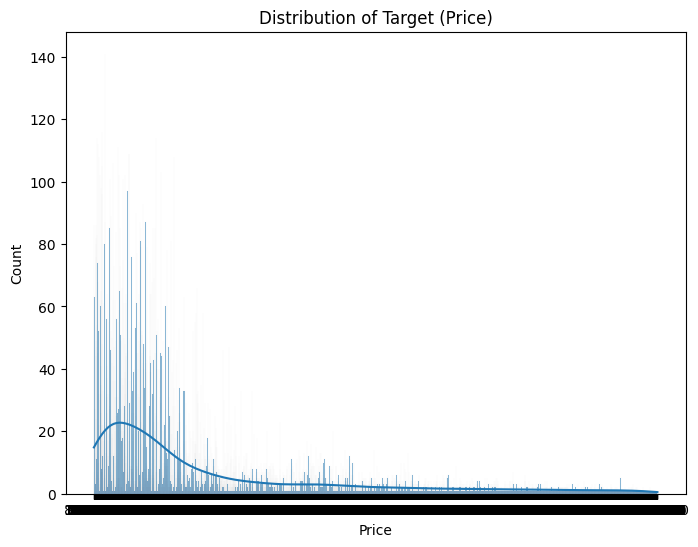

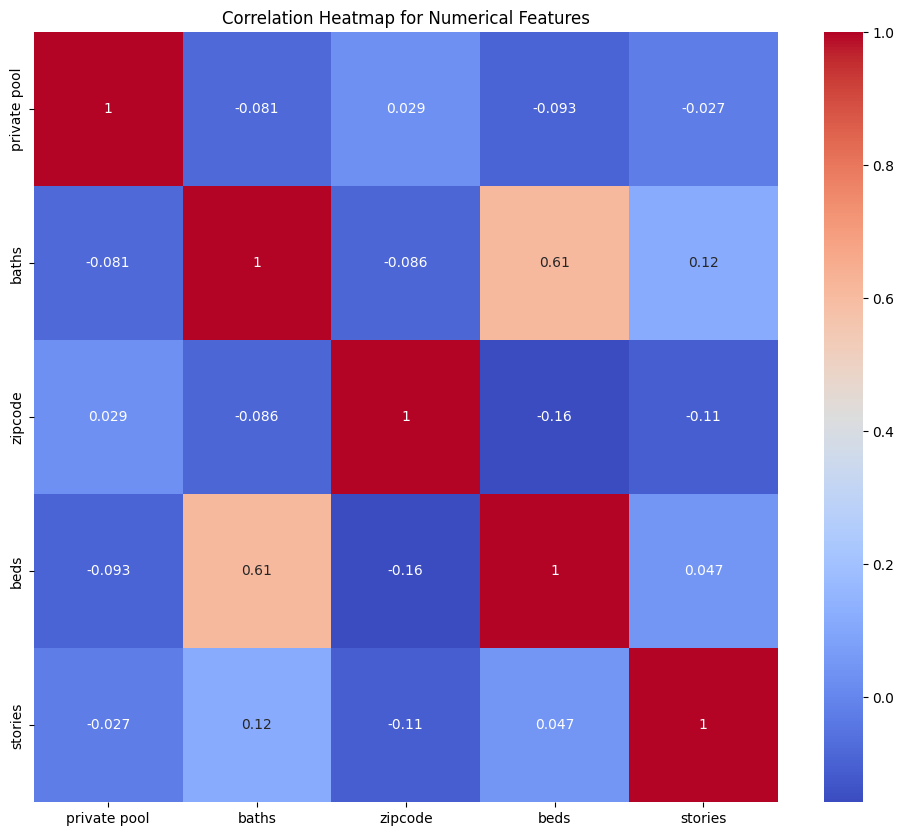

In [10]:
# Основные статистические характеристики данных
summary_stats = data.describe()
print(summary_stats)

# Распределение целевого признака
plt.figure(figsize=(8, 6))
sns.histplot(data['target'], kde=True)
plt.title('Distribution of Target (Price)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Корреляционный анализ числовых признаков
numerical_features = data.select_dtypes(include=[float, int])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

Можно сделать вывод, что числовых признаков, которые оказывают бльшое влияние на цену нет, а вот stories, state и propertyType влияют на цену

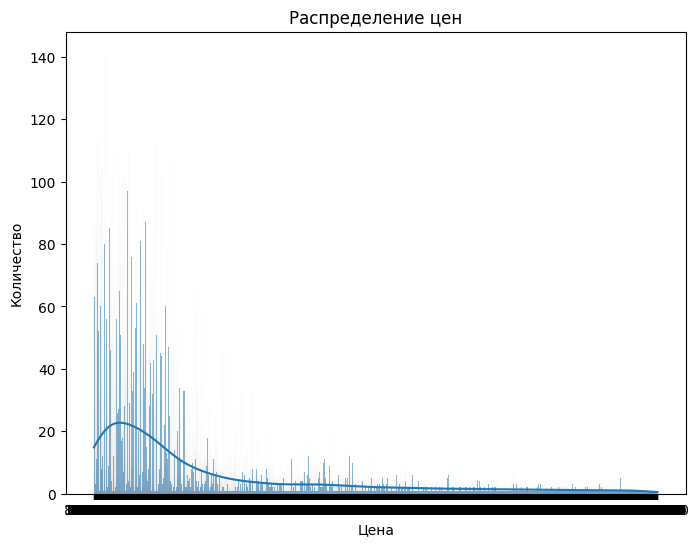

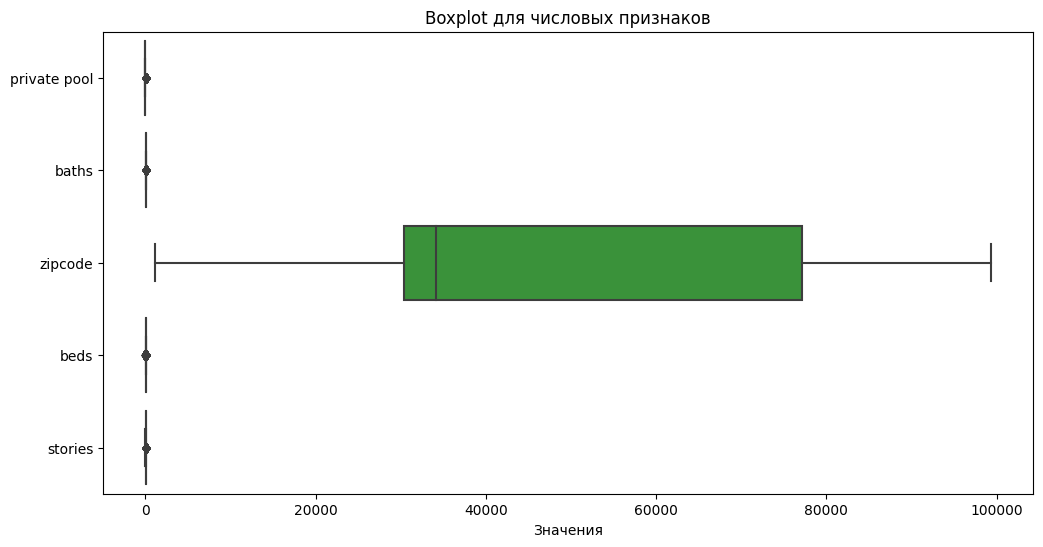

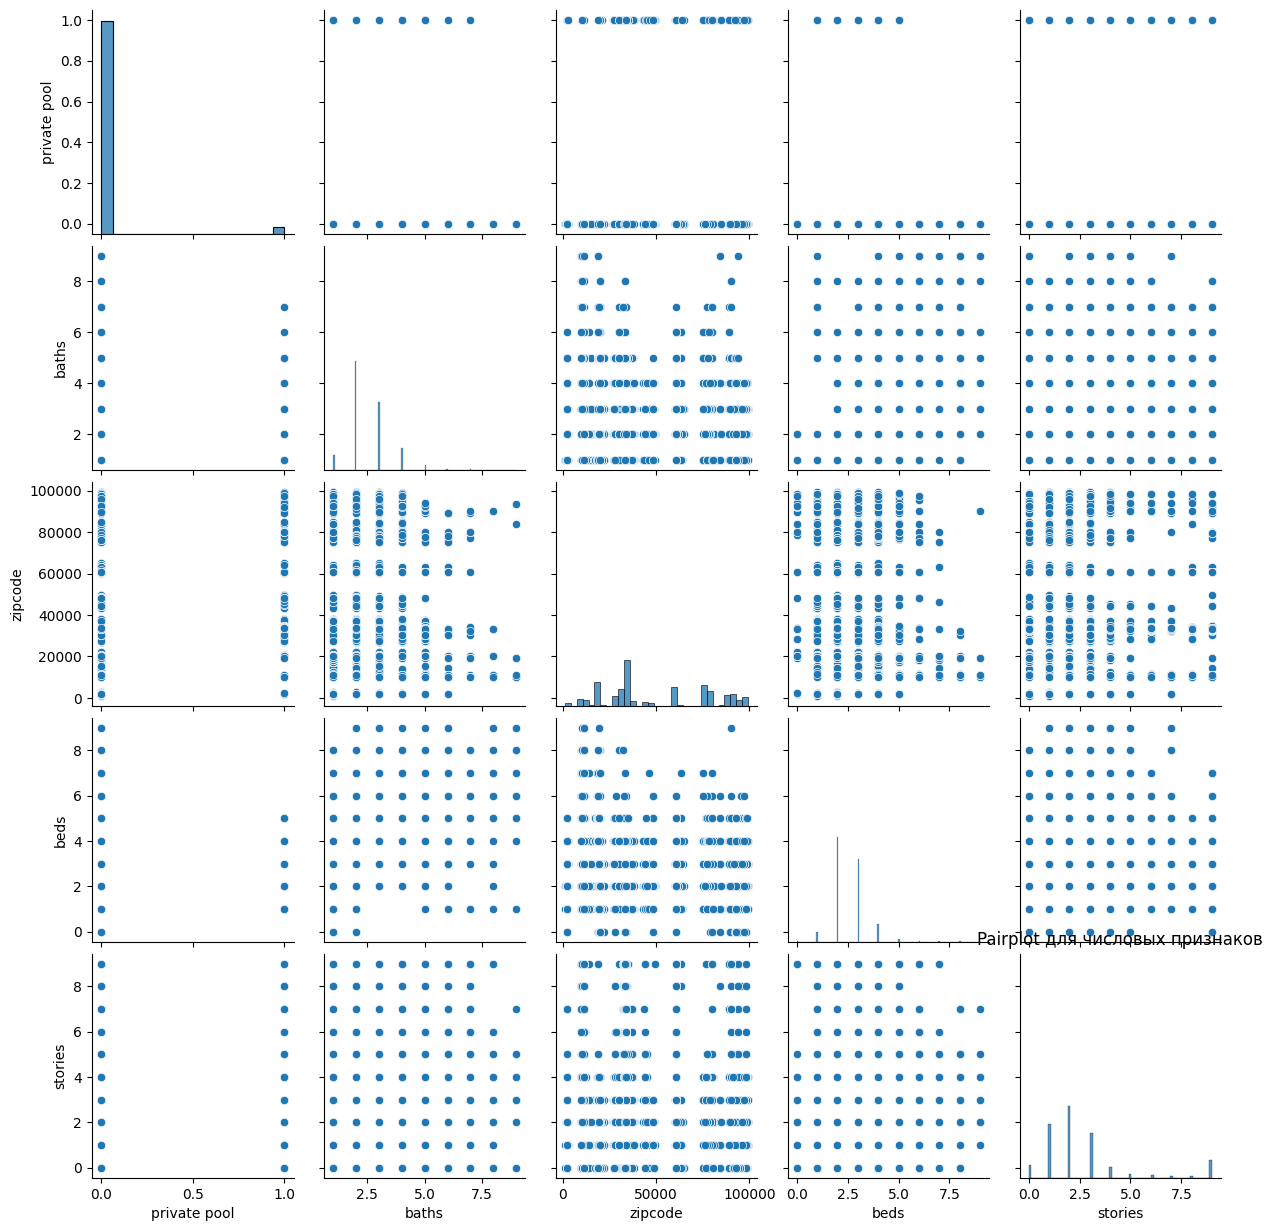

In [11]:
# Гистограмма для целевого признака (цен)
plt.figure(figsize=(8, 6))
sns.histplot(data['target'], kde=True)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

# Boxplot для числовых признаков
numerical_features = data.select_dtypes(include=[float, int])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_features, orient='h')
plt.title('Boxplot для числовых признаков')
plt.xlabel('Значения')
plt.show()

# Pairplot для корреляций между числовыми признаками
sns.pairplot(data=numerical_features)
plt.title('Pairplot для числовых признаков')
plt.show()

In [16]:
pip install catboost


[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 101.0/101.0 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


In [21]:

X = data[['state', 'stories', 'propertyType']]
y = data['target']


# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna('missing').astype(str)
X_test = X_test.fillna('missing').astype(str) 

# Обучение модели CatBoost
cat_features = list(range(X.shape[1])) # Индексы категориальных признаков
catboost_model = CatBoostRegressor(iterations=100, depth=3, cat_features=cat_features, verbose=False)
catboost_model.fit(X_train, y_train)

# Предсказание и оценка модели CatBoost
y_pred_catboost = catboost_model.predict(X_test)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
print(f'Mean Squared Error for CatBoost: {mse_catboost}')

# Создание конвейера для модели Random Forest с использованием One-Hot Encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, ['state', 'stories', 'propertyType'])
    ])

# Обучение модели Random Forest в конвейере
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(n_estimators=100, random_state=42))])
rf_pipeline.fit(X_train, y_train)

# Предсказание и оценка модели Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error for Random Forest: {mse_rf}')

Mean Squared Error for CatBoost: 3395816524176.551
Mean Squared Error for Random Forest: 3369725403982.103


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

features = data[['stories', 'state', 'propertyType']]
target = data['target']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
model = LinearRegression()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared : {r2}')

Mean Squared Error: 3700292265242.7393
R-squared : 0.2074638241256107
